In [63]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [21]:
iris = load_iris()

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df = df.drop(['sepal length (cm)' , 'sepal width (cm)'] , axis = 1)

In [20]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [23]:
df['target'] = iris.target

In [24]:
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [26]:
df['Flower Name'] = df.target.apply( lambda x : iris.target_names[x])

In [27]:
df.head()

,petal length (cm),petal width (cm),target,Flower Name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


In [39]:
X = df[['petal length (cm)' , 'petal width (cm)']]

In [41]:
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [48]:
y = df.target

In [50]:
df1 = df[df.target == 0]
df2 = df[df.target == 1]
df3 = df[df.target == 2]

Text(0,0.5,'Petal Width (cm)')

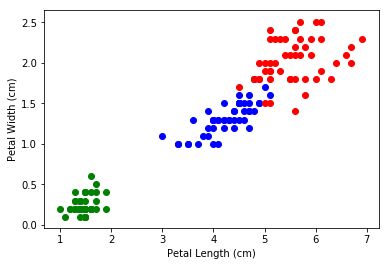

In [55]:
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color = 'green')
plt.scatter(df2['petal length (cm)'] , df2['petal width (cm)'] , color = 'blue')
plt.scatter(df3['petal length (cm)'] , df3['petal width (cm)'] , color = 'red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

In [59]:
k_rng = range(1,10)
sse = []
for k in k_rng :
    km = KMeans(n_clusters = k)
    km.fit(X,y)
    sse.append(km.inertia_)   

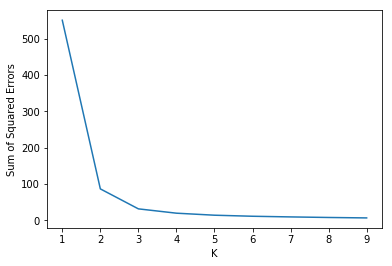

In [60]:
plt.xlabel("K")
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng , sse)

In [66]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(X)

In [67]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
print(mean_absolute_error(y , y_predicted))

0.6266666666666667
